In [31]:
import numpy as np
import matplotlib.pyplot as plt
import geometry as gm
import greensfunctions as GF

# Define the box coordinates
H = 1e3
L = H
ngrid = 4
corners = np.array([[-L, 0], [L, 0], [L, -H], [-L, -H], [-L, 0]])

# Create arrays of the x and y coordinates of the corners
x, z = [], []
for i in range(4):
    lsegment = np.sqrt((corners[i,0]-corners[(i+1),0])**2 + (corners[i,1]-corners[(i+1),1])**2)
    xi = np.linspace(corners[i][0], corners[(i + 1) % 4][0], num=round(lsegment*ngrid/H), endpoint=False)
    zi = np.linspace(corners[i][1], corners[(i + 1) % 4][1], num=round(lsegment*ngrid/H), endpoint=False)
    x.append(xi)
    z.append(zi)
x.append(corners[0,0])
z.append(corners[0,1])
x = np.hstack(x)
z = np.hstack(z)


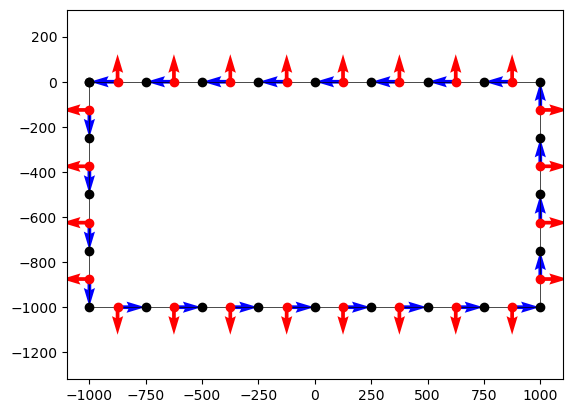

In [32]:
# x = np.linspace(-10e3,10e3,12)
# z = np.zeros_like(x)# + np.random.normal(0,1,np.shape(x))
# create a geometry object with those nodes
rcv = gm.geometry(x,z)

# plot geometry
plt.plot(rcv.xn,rcv.zn,'ko-',linewidth=0.5)
plt.plot(rcv.x,rcv.z,'ro')
plt.quiver(rcv.x,rcv.z,rcv.nv[:,0],rcv.nv[:,1],color='r',linewidth=0.1)
plt.quiver(rcv.x,rcv.z,rcv.dv[:,0],rcv.dv[:,1],color='b',linewidth=1)
plt.axis('equal')
plt.show()

# vars(rcv)

In [33]:
# compute traction kernels
Ks_s,Kn_s,Ks_n,Kn_n = GF.compute_tractionkernel(rcv,rcv)
